In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn import metrics
#from sklearn.datasets import make_blobs

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, [3, 4]].values

In [4]:
from sklearn.cluster import AffinityPropagation
afp = AffinityPropagation(random_state=5)
label = afp.fit_predict(X)
cluster_centers_indices = afp.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 11


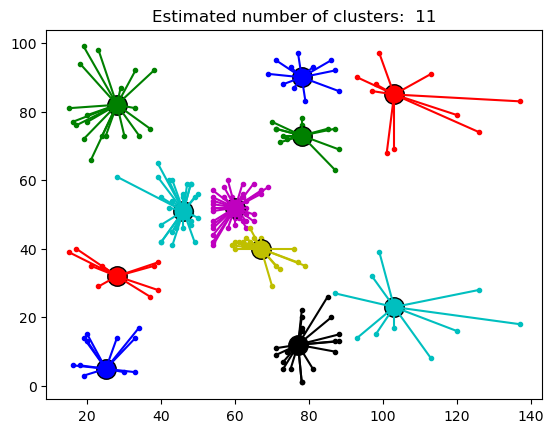

In [5]:
from itertools import cycle
plt.close('all')
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = label == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

In [6]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


/Users/viswanathanmuthu/anaconda3/envs/AIVE_Course/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/viswanathanmuthu/anaconda3/envs/AIVE_Course/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


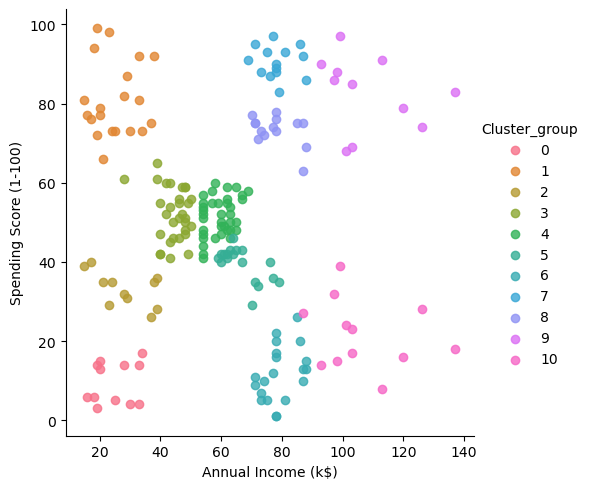

In [7]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)

In [9]:
from sklearn.cluster import AffinityPropagation
afp = AffinityPropagation(preference=-10000,random_state=5)
label = afp.fit(X)
cluster_centers_indices = afp.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 4


/Users/viswanathanmuthu/anaconda3/envs/AIVE_Course/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
